In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
import folium
import json
from glob import glob
import missingno as msno

In [2]:
# 불러오기
df = pd.read_csv('./datas/domestic_market_size.csv')
market_size_raw = pd.DataFrame(df)
market_size_raw.head(20)

,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,(0001)전산업,"855,409,035","1,395,749,584","2,058,128,879","2,203,889,676","2,396,507,678","2,769,841,236","2,752,650,935","3,104,104,141","3,464,007,891","3,541,314,391","3,528,271,720","3,579,923,048","3,603,500,766","3,809,135,923","4,081,292,159","4,252,327,674"
1,(0002)농림어업,"36,458,912","43,129,888","49,432,802","50,199,190","52,000,980","59,294,211","60,552,281","62,801,536","67,654,165","68,988,576","68,446,124","68,188,869","72,218,975","70,766,518","72,047,857","73,399,431"
2,(0003)광업,"16,140,974","42,617,160","68,315,871","83,244,590","87,435,664","146,805,534","112,224,299","134,440,937","185,822,052","194,789,041","179,588,875","168,290,439","112,386,545","94,427,643","124,161,708","154,199,770"
3,(0004)제조업,"405,402,030","615,494,763","880,522,626","934,848,521","1,028,049,070","1,225,082,005","1,186,702,760","1,393,742,435","1,608,547,923","1,605,810,494","1,556,810,694","1,559,629,457","1,432,692,898","1,490,319,219","1,591,959,873","1,631,824,545"
4,(0005)전기가스수도,"15,066,111","31,503,172","46,423,892","51,287,821","55,220,980","65,079,483","64,808,425","75,838,458","85,339,132","99,271,960","105,789,218","108,403,818","94,635,136","93,618,157","96,364,137","103,795,286"
5,(0006)폐수처리 및 자원재활용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"16,484,664","17,560,787","16,990,036","17,485,403","18,064,751","14,879,217","15,441,213","17,755,282","18,485,481"
6,(0007)건설,"82,463,374","99,096,907","150,470,135","153,315,180","166,693,235","180,679,909","188,031,835","179,833,579","181,179,685","180,753,440","190,336,161","193,740,601","209,591,301","246,913,064","273,884,361","271,578,216"
7,(0008)서비스업,"299,877,634","563,907,694","862,963,553","930,994,374","1,007,107,749","1,092,900,094","1,140,331,335","1,240,962,532","1,317,904,147","1,374,710,844","1,409,815,245","1,463,605,113","1,667,096,694","1,797,650,109","1,905,118,941","1,999,044,945"
8,(1000)제조업,"405,402,030","615,494,763","880,522,626","934,848,521","1,028,049,070","1,225,082,005","1,186,702,760","1,393,742,435","1,608,547,923","1,605,810,494","1,556,810,694","1,559,629,457","1,432,692,898","1,490,319,219","1,591,959,873","1,631,824,545"
9,(1101)의약,"6,503,760","8,389,327","13,498,180","14,843,966","16,250,727","18,102,780","19,411,109","17,473,461","18,026,178","18,694,391","18,460,611","19,571,129","20,742,424","23,866,647","24,926,590","26,687,523"


<AxesSubplot:>

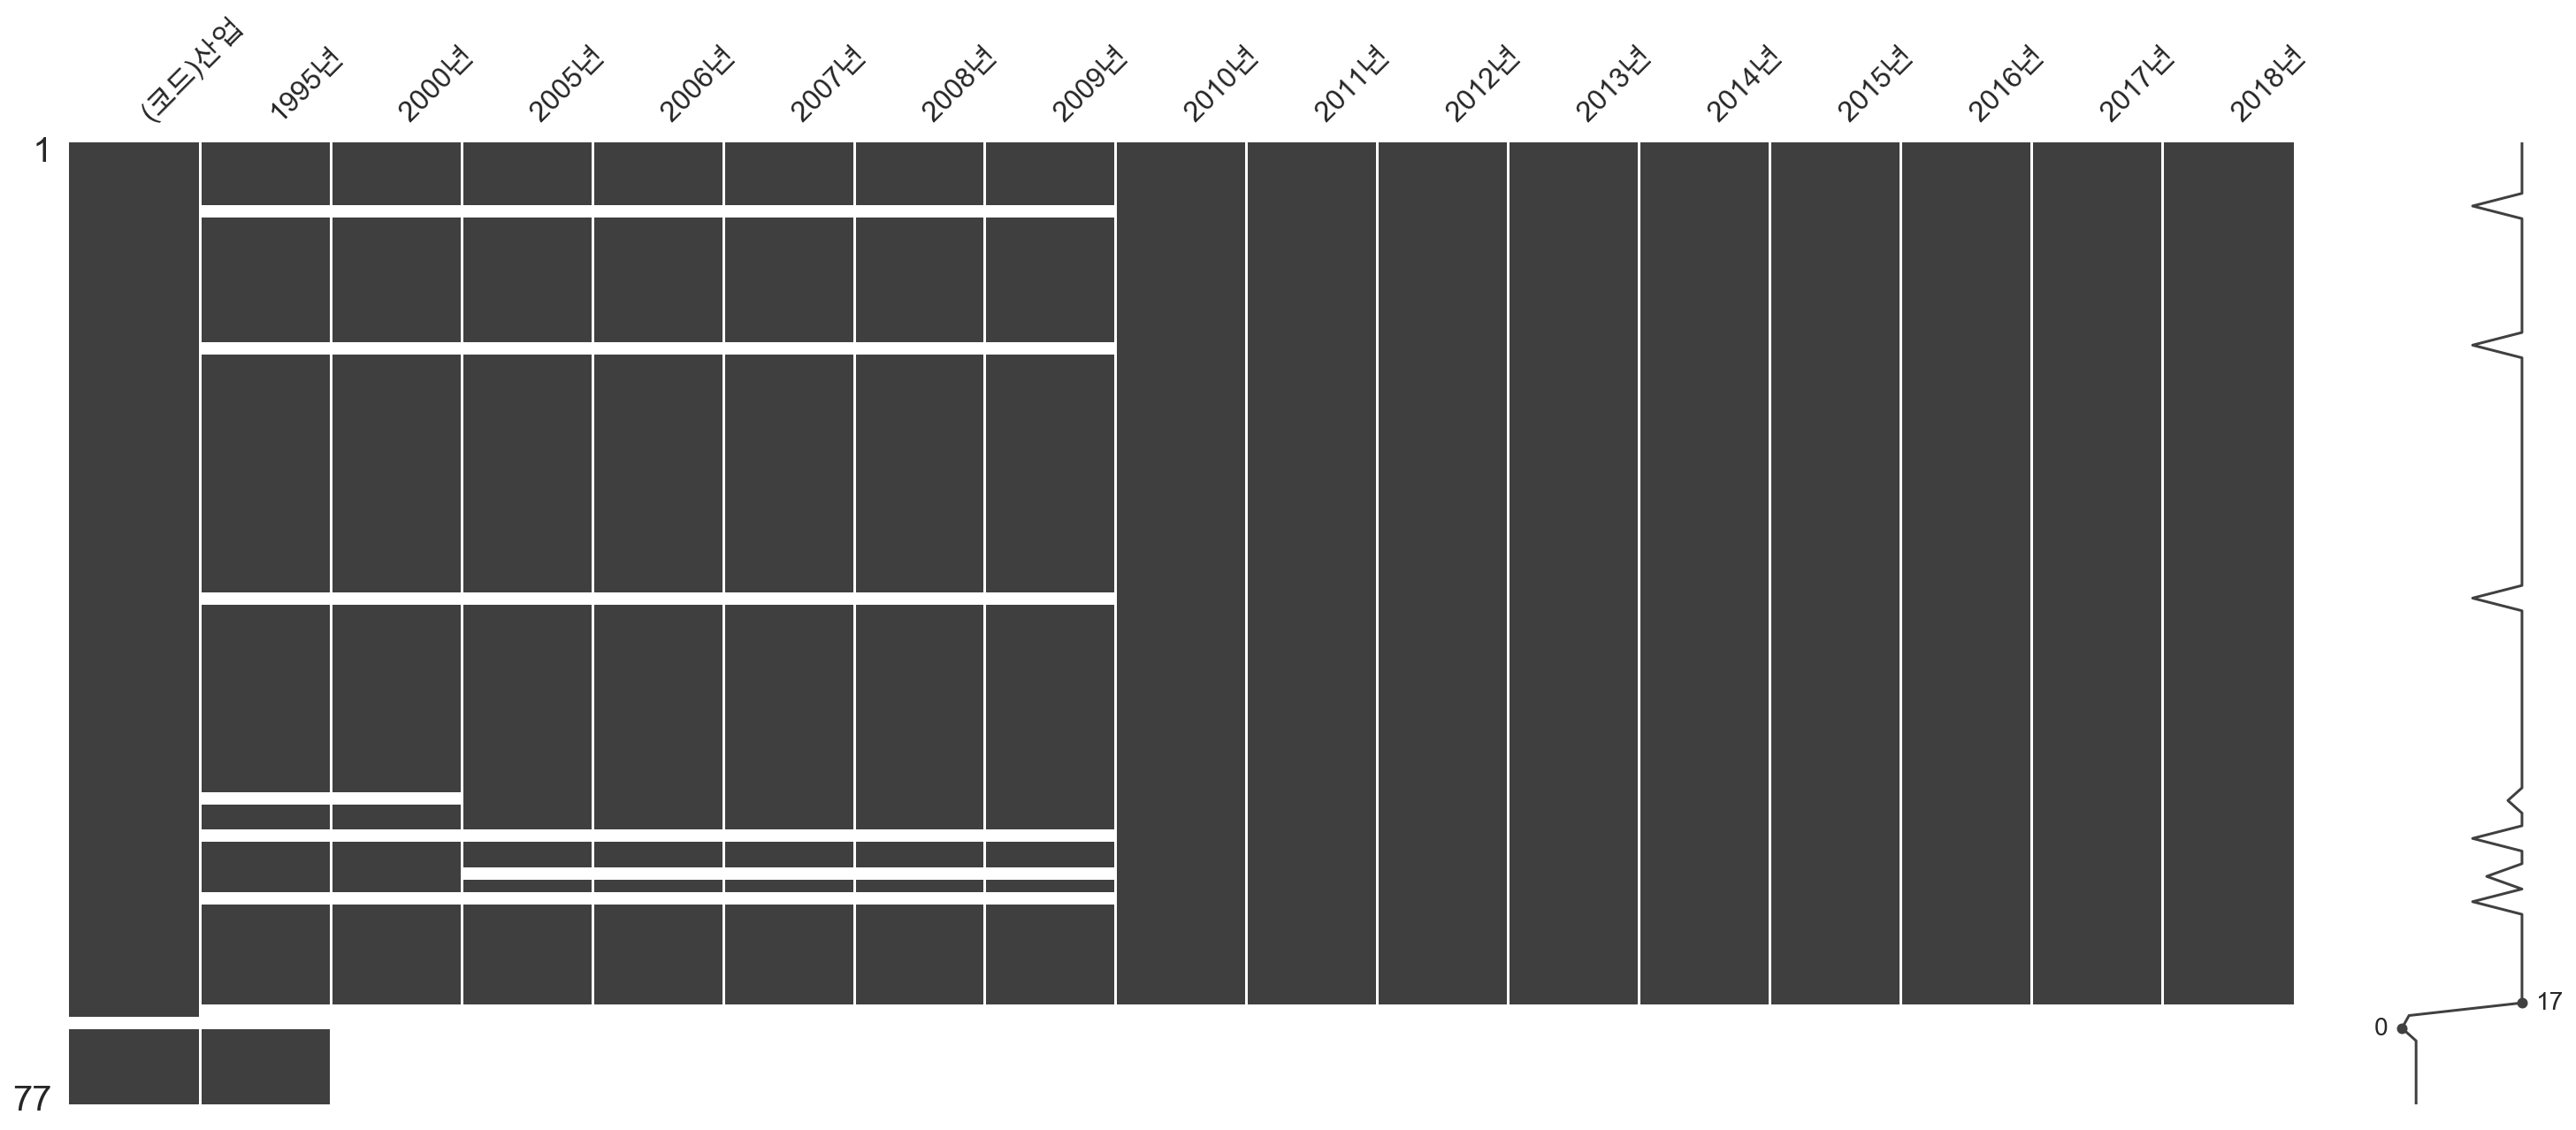

In [3]:
# NaN data 확인
msno.matrix(market_size_raw)

In [4]:
# NaN data = 0 입력
market_size_raw.fillna(value=0, inplace=True)

<AxesSubplot:>

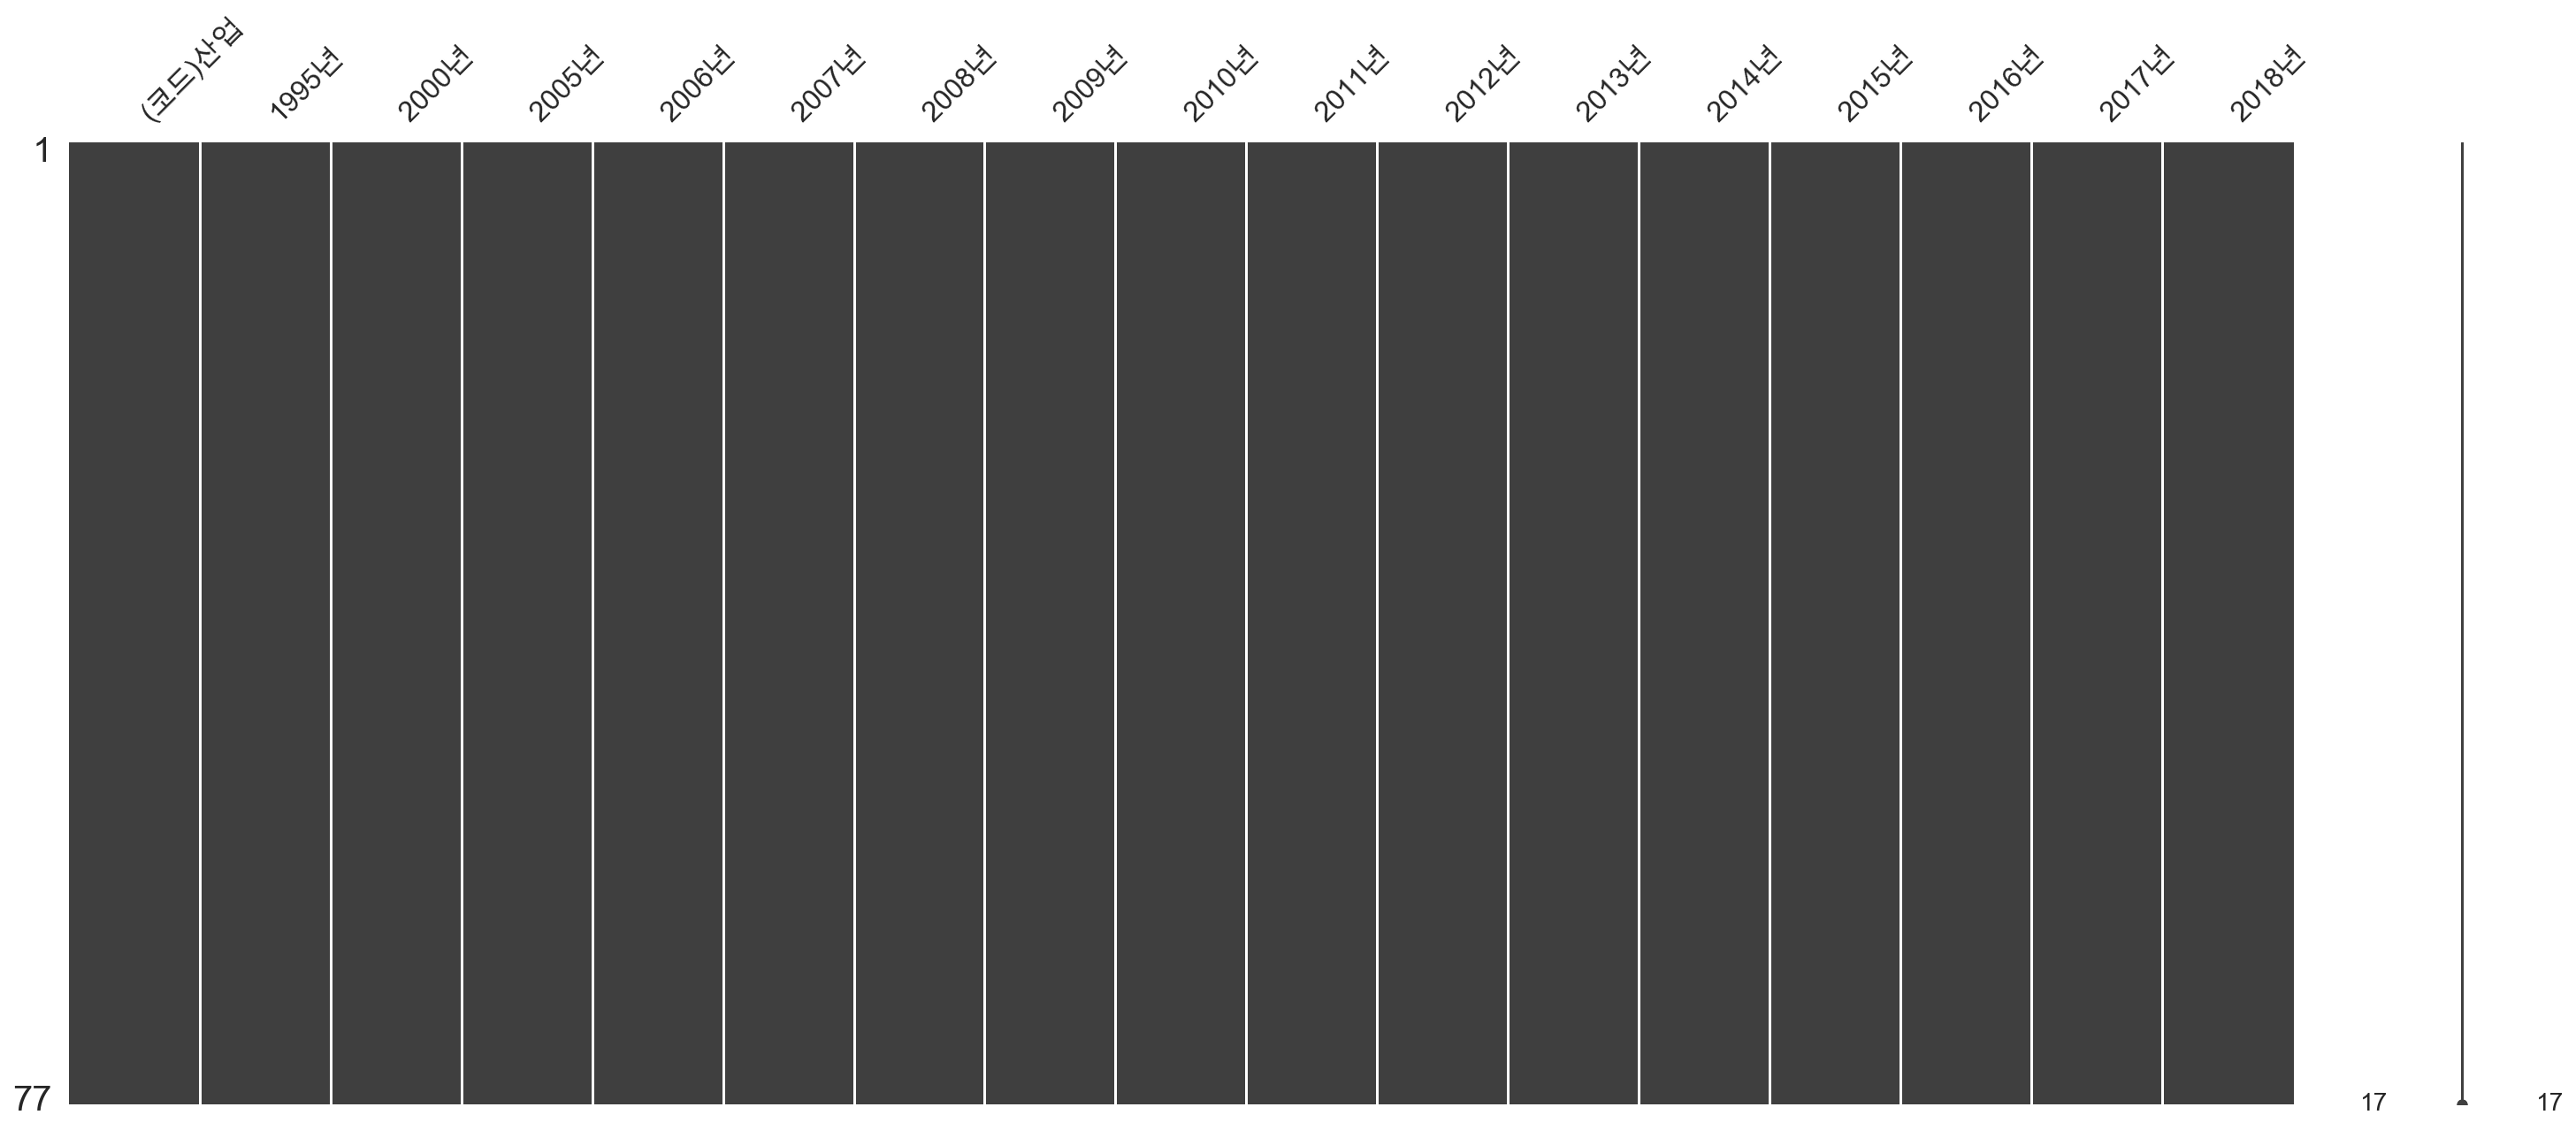

In [5]:
msno.matrix(market_size_raw)

In [6]:
market_size_raw.tail(10)

,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
67,(2402)예술·스포츠·여가,"5,917,011","11,986,951","25,429,607","27,834,302","32,300,938","31,156,089","31,384,365","27,177,344","28,219,156","29,852,367","30,127,184","31,295,850","39,240,347","46,602,005","49,592,384","53,733,212"
68,(2403)기타 서비스,"27,403,960","48,205,410","67,432,000","72,516,422","75,422,503","84,323,106","86,103,290","40,953,135","43,461,199","45,499,089","46,862,662","48,382,244","55,884,784","59,819,920","61,561,001","62,895,868"
69,분석정보 : 국내시장규모,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,테이블명,국내시장규모,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,주기,[년],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,탑재기간,1995~2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,업데이트 일자,2020.7.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,비고,ㅇ원자료 : 한국은행의 산업연관표ㅇ산식 : 국내시장규모=총산출+수입-수출,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,단위,백만 원,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# 마지막 69 ~ 76행 삭제
market_size_raw = market_size_raw.drop(market_size_raw.index[69:77])
market_size_raw.tail(10)

,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
59,(2208)전문·과학기술,"24,001,145","49,024,640","80,673,832","88,505,569","96,697,311","107,167,332","119,260,675","110,644,578","115,102,646","124,138,014","128,927,575","135,496,639","192,969,566","202,088,976","213,199,125","227,881,966"
60,(2209)사업시설관리서비스,0,0,0,0,0,0,0,"7,091,275","7,523,938","7,941,888","8,162,207","8,801,936","13,639,970","13,939,471","15,441,508","16,354,232"
61,(2210)사업지원,"5,162,600","12,057,772","25,673,800","30,891,672","34,198,571","38,340,391","36,820,773","33,235,947","34,611,312","37,385,559","38,093,593","41,816,019","44,762,438","46,391,439","50,110,053","51,379,300"
62,(2301)공공행정,"25,702,390","43,601,282","69,304,912","75,111,282","80,755,069","87,940,505","93,743,124","93,057,370","99,189,047","104,956,986","112,023,538","120,215,512","120,292,973","129,925,235","139,208,222","147,322,579"
63,(2303)교육,"20,821,715","31,230,922","60,756,673","66,776,516","72,787,882","80,152,377","85,248,680","94,639,087","99,007,349","102,581,386","104,051,973","106,804,454","118,433,363","119,910,335","123,032,795","126,356,143"
64,(2304)의료·보건,"12,720,855","28,090,174","51,241,779","57,098,707","62,973,518","68,894,678","77,098,022","69,507,865","75,295,876","80,088,685","84,200,093","90,190,020","98,587,837","104,149,075","115,224,831","123,518,851"
65,(2305)사회복지,"901,536","2,968,472","6,753,234","7,280,284","8,656,482","9,469,430","10,330,125","16,993,861","18,025,583","19,837,012","21,186,133","23,212,833","24,993,913","28,543,812","29,044,211","32,700,766"
66,(2401)숙박·음식점,"8,316,148","43,056,884","58,602,400","64,394,169","69,241,706","76,113,227","80,341,897","84,803,633","90,672,219","94,134,560","97,956,720","101,563,180","131,581,004","152,382,377","163,495,273","173,902,442"
67,(2402)예술·스포츠·여가,"5,917,011","11,986,951","25,429,607","27,834,302","32,300,938","31,156,089","31,384,365","27,177,344","28,219,156","29,852,367","30,127,184","31,295,850","39,240,347","46,602,005","49,592,384","53,733,212"
68,(2403)기타 서비스,"27,403,960","48,205,410","67,432,000","72,516,422","75,422,503","84,323,106","86,103,290","40,953,135","43,461,199","45,499,089","46,862,662","48,382,244","55,884,784","59,819,920","61,561,001","62,895,868"


In [8]:
market_size_raw['(코드)산업']

0           (0001)전산업
1          (0002)농림어업
2            (0003)광업
3           (0004)제조업
4        (0005)전기가스수도
           ...       
64        (2304)의료·보건
65         (2305)사회복지
66       (2401)숙박·음식점
67    (2402)예술·스포츠·여가
68       (2403)기타 서비스
Name: (코드)산업, Length: 69, dtype: object

In [9]:
# 코드 - 산업 컬럼 분리
code_ind = market_size_raw['(코드)산업'].str.split(')')
market_size_raw['코드'] = code_ind.str.get(0)
market_size_raw['산업'] = code_ind.str.get(1)
market_size_raw.head()

,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,코드,산업
0,(0001)전산업,"855,409,035","1,395,749,584","2,058,128,879","2,203,889,676","2,396,507,678","2,769,841,236","2,752,650,935","3,104,104,141","3,464,007,891","3,541,314,391","3,528,271,720","3,579,923,048","3,603,500,766","3,809,135,923","4,081,292,159","4,252,327,674",(0001,전산업
1,(0002)농림어업,"36,458,912","43,129,888","49,432,802","50,199,190","52,000,980","59,294,211","60,552,281","62,801,536","67,654,165","68,988,576","68,446,124","68,188,869","72,218,975","70,766,518","72,047,857","73,399,431",(0002,농림어업
2,(0003)광업,"16,140,974","42,617,160","68,315,871","83,244,590","87,435,664","146,805,534","112,224,299","134,440,937","185,822,052","194,789,041","179,588,875","168,290,439","112,386,545","94,427,643","124,161,708","154,199,770",(0003,광업
3,(0004)제조업,"405,402,030","615,494,763","880,522,626","934,848,521","1,028,049,070","1,225,082,005","1,186,702,760","1,393,742,435","1,608,547,923","1,605,810,494","1,556,810,694","1,559,629,457","1,432,692,898","1,490,319,219","1,591,959,873","1,631,824,545",(0004,제조업
4,(0005)전기가스수도,"15,066,111","31,503,172","46,423,892","51,287,821","55,220,980","65,079,483","64,808,425","75,838,458","85,339,132","99,271,960","105,789,218","108,403,818","94,635,136","93,618,157","96,364,137","103,795,286",(0005,전기가스수도


In [10]:
# 코드 행 '('삭제

for i in range(len(market_size_raw['코드'])):
    market_size_raw['코드'][i] = market_size_raw['코드'][i][1:]
market_size_raw.head()

,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,코드,산업
0,(0001)전산업,"855,409,035","1,395,749,584","2,058,128,879","2,203,889,676","2,396,507,678","2,769,841,236","2,752,650,935","3,104,104,141","3,464,007,891","3,541,314,391","3,528,271,720","3,579,923,048","3,603,500,766","3,809,135,923","4,081,292,159","4,252,327,674",0001,전산업
1,(0002)농림어업,"36,458,912","43,129,888","49,432,802","50,199,190","52,000,980","59,294,211","60,552,281","62,801,536","67,654,165","68,988,576","68,446,124","68,188,869","72,218,975","70,766,518","72,047,857","73,399,431",0002,농림어업
2,(0003)광업,"16,140,974","42,617,160","68,315,871","83,244,590","87,435,664","146,805,534","112,224,299","134,440,937","185,822,052","194,789,041","179,588,875","168,290,439","112,386,545","94,427,643","124,161,708","154,199,770",0003,광업
3,(0004)제조업,"405,402,030","615,494,763","880,522,626","934,848,521","1,028,049,070","1,225,082,005","1,186,702,760","1,393,742,435","1,608,547,923","1,605,810,494","1,556,810,694","1,559,629,457","1,432,692,898","1,490,319,219","1,591,959,873","1,631,824,545",0004,제조업
4,(0005)전기가스수도,"15,066,111","31,503,172","46,423,892","51,287,821","55,220,980","65,079,483","64,808,425","75,838,458","85,339,132","99,271,960","105,789,218","108,403,818","94,635,136","93,618,157","96,364,137","103,795,286",0005,전기가스수도


In [11]:
# (코드)산업 열 삭제
market_size_raw = market_size_raw.drop(['(코드)산업'], axis = 1)
market_size_raw.head()

,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,코드,산업
0,"855,409,035","1,395,749,584","2,058,128,879","2,203,889,676","2,396,507,678","2,769,841,236","2,752,650,935","3,104,104,141","3,464,007,891","3,541,314,391","3,528,271,720","3,579,923,048","3,603,500,766","3,809,135,923","4,081,292,159","4,252,327,674",0001,전산업
1,"36,458,912","43,129,888","49,432,802","50,199,190","52,000,980","59,294,211","60,552,281","62,801,536","67,654,165","68,988,576","68,446,124","68,188,869","72,218,975","70,766,518","72,047,857","73,399,431",0002,농림어업
2,"16,140,974","42,617,160","68,315,871","83,244,590","87,435,664","146,805,534","112,224,299","134,440,937","185,822,052","194,789,041","179,588,875","168,290,439","112,386,545","94,427,643","124,161,708","154,199,770",0003,광업
3,"405,402,030","615,494,763","880,522,626","934,848,521","1,028,049,070","1,225,082,005","1,186,702,760","1,393,742,435","1,608,547,923","1,605,810,494","1,556,810,694","1,559,629,457","1,432,692,898","1,490,319,219","1,591,959,873","1,631,824,545",0004,제조업
4,"15,066,111","31,503,172","46,423,892","51,287,821","55,220,980","65,079,483","64,808,425","75,838,458","85,339,132","99,271,960","105,789,218","108,403,818","94,635,136","93,618,157","96,364,137","103,795,286",0005,전기가스수도


In [13]:
# 코드 행을 인덱스로 만들기
market_size_raw = market_size_raw.set_index('코드')
market_size_raw.head()

,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,산업
코드,,,,,,,,,,,,,,,,,
0001,"855,409,035","1,395,749,584","2,058,128,879","2,203,889,676","2,396,507,678","2,769,841,236","2,752,650,935","3,104,104,141","3,464,007,891","3,541,314,391","3,528,271,720","3,579,923,048","3,603,500,766","3,809,135,923","4,081,292,159","4,252,327,674",전산업
0002,"36,458,912","43,129,888","49,432,802","50,199,190","52,000,980","59,294,211","60,552,281","62,801,536","67,654,165","68,988,576","68,446,124","68,188,869","72,218,975","70,766,518","72,047,857","73,399,431",농림어업
0003,"16,140,974","42,617,160","68,315,871","83,244,590","87,435,664","146,805,534","112,224,299","134,440,937","185,822,052","194,789,041","179,588,875","168,290,439","112,386,545","94,427,643","124,161,708","154,199,770",광업
0004,"405,402,030","615,494,763","880,522,626","934,848,521","1,028,049,070","1,225,082,005","1,186,702,760","1,393,742,435","1,608,547,923","1,605,810,494","1,556,810,694","1,559,629,457","1,432,692,898","1,490,319,219","1,591,959,873","1,631,824,545",제조업
0005,"15,066,111","31,503,172","46,423,892","51,287,821","55,220,980","65,079,483","64,808,425","75,838,458","85,339,132","99,271,960","105,789,218","108,403,818","94,635,136","93,618,157","96,364,137","103,795,286",전기가스수도


In [14]:
# 행 - 열 전환
market_size = market_size_raw.transpose()
market_size.tail()

코드,0001,0002,0003,0004,0005,0006,0007,0008,1000,1101,...,2208,2209,2210,2301,2303,2304,2305,2401,2402,2403
2015년,"3,603,500,766","72,218,975","112,386,545","1,432,692,898","94,635,136","14,879,217","209,591,301","1,667,096,694","1,432,692,898","20,742,424",...,"192,969,566","13,639,970","44,762,438","120,292,973","118,433,363","98,587,837","24,993,913","131,581,004","39,240,347","55,884,784"
2016년,"3,809,135,923","70,766,518","94,427,643","1,490,319,219","93,618,157","15,441,213","246,913,064","1,797,650,109","1,490,319,219","23,866,647",...,"202,088,976","13,939,471","46,391,439","129,925,235","119,910,335","104,149,075","28,543,812","152,382,377","46,602,005","59,819,920"
2017년,"4,081,292,159","72,047,857","124,161,708","1,591,959,873","96,364,137","17,755,282","273,884,361","1,905,118,941","1,591,959,873","24,926,590",...,"213,199,125","15,441,508","50,110,053","139,208,222","123,032,795","115,224,831","29,044,211","163,495,273","49,592,384","61,561,001"
2018년,"4,252,327,674","73,399,431","154,199,770","1,631,824,545","103,795,286","18,485,481","271,578,216","1,999,044,945","1,631,824,545","26,687,523",...,"227,881,966","16,354,232","51,379,300","147,322,579","126,356,143","123,518,851","32,700,766","173,902,442","53,733,212","62,895,868"
산업,전산업,농림어업,광업,제조업,전기가스수도,폐수처리 및 자원재활용,건설,서비스업,제조업,의약,...,전문·과학기술,사업시설관리서비스,사업지원,공공행정,교육,의료·보건,사회복지,숙박·음식점,예술·스포츠·여가,기타 서비스
